>**H1**: Hipótesis alternativa que desean demostrar. [4 puntos]  
**ML**: Técnica a aplicar. Realizarla sobre el dataset teniendo en cuenta que no es posible obtener nuevos datos. En los casos de métodos predictivos o de clasificación, dar un idea del error que se comente con el modelo elegido sobre el dataset. Deberá interpretar los resultados de manera extensa. [6 puntos]  
  
>**Justificar todos los pasos realizados.**

**msleep**

- **Name** Common name  
- **Genus**  
- **Vore** Carnivore, omnivore or herbivore?  
- **Order**  
- **Conservation** [The conservation status of the animal](https://en.wikipedia.org/wiki/Conservation_status) 
- **SleepTotal** Total amount of sleep, in hours  
- **SleepRem** REM sleep, in hours  
- **SleepCycle** Length of sleep cycle, in hours  
- **Awake** Amount of time spent awake, in hours  
- **BrainWt** Brain weight in kilograms  
- **BodyWt** Body weight in kilograms  

In [1]:
using RDatasets
msleep = dataset("ggplot2","msleep")
head(msleep)

,Name,Genus,Vore,Order,Conservation,SleepTotal,SleepRem,SleepCycle,Awake,BrainWt,BodyWt
1,Cheetah,Acinonyx,carni,Carnivora,lc,12.1,NaN,NaN,11.9,NaN,50.0
2,Owl monkey,Aotus,omni,Primates,NA,17.0,1.8,NaN,7.0,0.0155,0.48
3,Mountain beaver,Aplodontia,herbi,Rodentia,nt,14.4,2.4,NaN,9.6,NaN,1.35
4,Greater short-tailed shrew,Blarina,omni,Soricomorpha,lc,14.9,2.3,0.133333333,9.1,0.00029,0.019
5,Cow,Bos,herbi,Artiodactyla,domesticated,4.0,0.7,0.666666667,20.0,0.423,600.0
6,Three-toed sloth,Bradypus,herbi,Pilosa,NA,14.4,2.2,0.766666667,9.6,NaN,3.85


**Agustín**  

**H1**: El tamaño del animal tiene un efecto mayor sobre las horas de sueño que del tamaño de su cerebro.   
**ML**: LDA o regresión logística para lograr un clasificador de la dieta del animal dependiendo de las variables cuantitativas del dataset.  

**Miguel**  

**H1**: La cantidad de horas de sueño de un animal está relacionado con su dieta.   
**ML**: Realizar un clustering jerárquico de los animales utilizando las variables cuantitativas del dataset. Realizar además un clustering jerárquico de las variables cualitativas del dataset.  

**Cecilia**  

**H1**: La dieta del animal diferencia tanto a su cantidad de horas de sueño como al tiempo que pasa en sueño REM.   
**ML**: Lograr un modelo que permita predecir la cantidad de horas de sueño REM dependiendo de la cantidad de sueño total, del peso del animal y del peso de su cerebro.  

**Eloy**  

**H1**: El tamaño del animal tiene un efecto mayor sobre las horas de sueño que del tamaño de su cerebro.   
**ML**: LDA o regresión logística para lograr un clasificador de la dieta del animal dependiendo de las variables cuantitativas del dataset   

**Julia**  

**H1**: Los animales con un mayor tamaño corporal duermen más horas.   
**ML**: CA utilizando la dieta y el estado de conservación   

**Lorena**  

**H1**: La dieta del animal diferencia tanto a su cantidad de horas de sueño como al tiempo que pasa en sueño REM.   
**ML**: PCA de las variables cuantitativas del dataset    

**Sol**  

**H1**: La cantidad de horas de sueño de un animal está relacionado con su dieta.  
**ML**: Realizar un clustering jerárquico de los animales utilizando las variables cuantitativas del dataset. Realizar además un clustering jerárquico de las variables cualitativas del dataset.  

**Victorio**  

**H1**: Los animales con cerebros más grandes pasan más horas en sueño REM.   
**ML**: CA utilizando la dieta y el estado de conservación   

**Carina**  

**H1**: Los animales con cerebros más grandes pasan más horas en sueño REM.   
**ML**: Lograr un modelo que permita predecir la cantidad de horas de sueño REM dependiendo de la cantidad de sueño total, del peso del animal y del peso de su cerebro.   

**Ana**  

**H1**: Los animales con un mayor tamaño corporal duermen más horas.   
**ML**: PCA de las variables cuantitativas del dataset   

### Bonus [1 punto]:

[Plots.jl] Initializing backend: pyplot



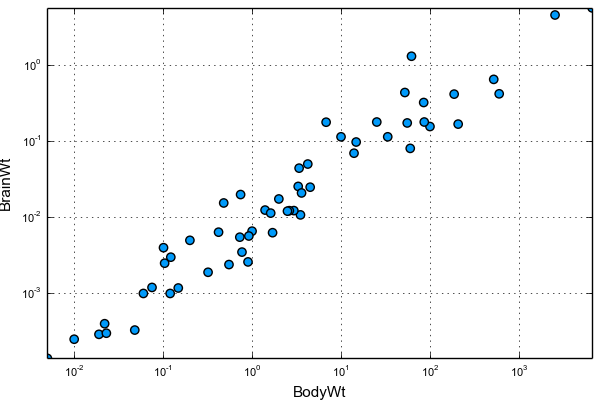

In [2]:
using Plots

subset = msleep[:,[:BodyWt, :BrainWt]]

subset[isnan(subset[:BodyWt]), :BodyWt] = NA
subset[isnan(subset[:BrainWt]), :BrainWt] = NA
complete_cases!(subset)

scatter(subset, :BodyWt, :BrainWt, scale=:log, legend=:none)

El [coeficiente de correlación lineal de Pearson](https://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient) entre el logaritmo del peso de un animal y el logaritmo del peso de su cerebro es (la relación entre las variables es lineal en escala logarítmica):

In [3]:
r = cor(log(subset[:BodyWt]), log(subset[:BrainWt]))

0.9653246165758779

Dado que la hipótesis nula es la ausencia de correlación (`r == 0.0`), y que [el siguiente estadístico sigue una distribución T de Student](https://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient#Testing_using_Student.27s_t-distribution) con `n-2` grados de libertdad (siendo `n` el número de puntos) bajo esa H0, **determinar el P value asociado a la H1: `r != 0.0`**
  
$$ t = r\sqrt{\frac{n-2}{1-r^{2}}} $$